In [25]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [26]:
import sys
import os
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib
import netCDF4 as cdf
import numpy as np
import pylab as plb
from tm5tools import globarea
import calendar

In [27]:
labels = ['SiBCASA-GFED4','GFAS','FINN','CASA-GFED4','CASA-GFED4-d']
labels2 = ['FINN','FINN_2']

biofireparamdirs=[
'/Storage/CO2/carbontracker/input/ctdas_2012/biosphere/gfed4_daily_sibcasa_3hr/',
'/Storage/CO2/carbontracker/input/ctdas_2012/biosphere/gfed4_daily_sibcasa_3hr_gfas_fires/',
'/Storage/CO2/carbontracker/input/ctdas_2012/biosphere/gfed4_daily_sibcasa_3hr_finn_fires/', #FINN
#'/Storage/CO2/carbontracker/input/ctdas_2012/biosphere/casa-gfed4-3h-fires-monthly-bio/', #CASA-GFED4 fires 3h
'/Storage/CO2/carbontracker/input/ctdas_2012/biosphere/casa-gfed4-daily-fires-monthly-bio/'#CASA-GFED4 fires daily
#'/Storage/CO2/carbontracker/input/ctdas_2012/biosphere/gfed4_daily_sibcasa_3hr_finn_fires_2'
]


In [28]:
fac = 86400.*365.*12./1.e15
glarea = globarea(im=360,jm=180)

<type 'numpy.ndarray'> (180, 360)


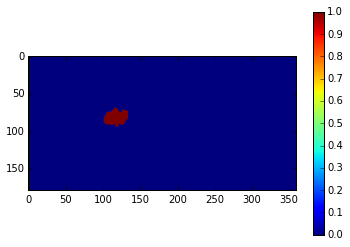

In [29]:
mf = cdf.Dataset('/Users/botia/daily_fires/amazon_mask.nc')
mask = mf.variables['regionmask'][:]
imshow(mask)
colorbar()
print type(mask),shape(mask)


In [30]:
x = np.arange(-180,181,1.0)
lat = np.tile(x,(181,1))
y = np.arange(-90,91,1.0)
lon = np.transpose(np.tile(y,(361,1)))
data = np.zeros((180,360))

#Indonesia location in degree
llcrnrlat=-11.2207489
urcrnrlat=7.3225174
llcrnrlon=94.52804565
urcrnrlon=138.8216095

#Indonesia location in grid point
llcrnrlat_indonesia = np.argmin(np.abs(y-llcrnrlat))
urcrnrlat_indonesia = np.argmin(np.abs(y-urcrnrlat))
llcrnrlon_indonesia = np.argmin(np.abs(x-llcrnrlon))
urcrnrlon_indonesia = np.argmin(np.abs(x-urcrnrlon))

print("low corner latitude at grid: "+str(llcrnrlat_indonesia))
print("upper corner latitude at grid: "+str(urcrnrlat_indonesia))
print("low corner longitude at grid: "+str(llcrnrlon_indonesia))
print("upper corner longitude at grid: "+str(urcrnrlon_indonesia))


#mask Indonesia

for i in range (79,97):
    for n in range (275,319):
        data[i][n] = ma.masked_array(data=1)
        
#data[79][319]=1
#data[79][275]=1
#data[97][319]=1
#data[97][275]=1

#plt.contourf(lat,lon,data)
#plt.grid()
#plt.xlabel('longitude')
#plt.ylabel('latitude')
#plt.show()



low corner latitude at grid: 79
upper corner latitude at grid: 97
low corner longitude at grid: 275
upper corner longitude at grid: 319


<type 'numpy.ndarray'> (180, 360)


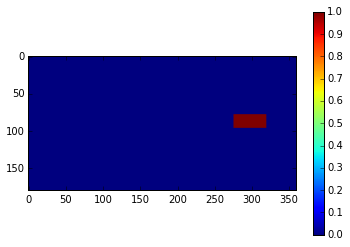

In [31]:
imshow(data)
colorbar()
print type(data), shape(data)

/Storage/CO2/carbontracker/input/ctdas_2012/biosphere/gfed4_daily_sibcasa_3hr/
2010
2011
2012
2013
2014
2015
/Storage/CO2/carbontracker/input/ctdas_2012/biosphere/gfed4_daily_sibcasa_3hr_gfas_fires/
2010
2011
2012
2013
2014
2015
/Storage/CO2/carbontracker/input/ctdas_2012/biosphere/gfed4_daily_sibcasa_3hr_finn_fires/
2010
2011
2012
2013
2014
2015
/Storage/CO2/carbontracker/input/ctdas_2012/biosphere/casa-gfed4-daily-fires-monthly-bio/
2010
2011
2012
2013
2014
2015


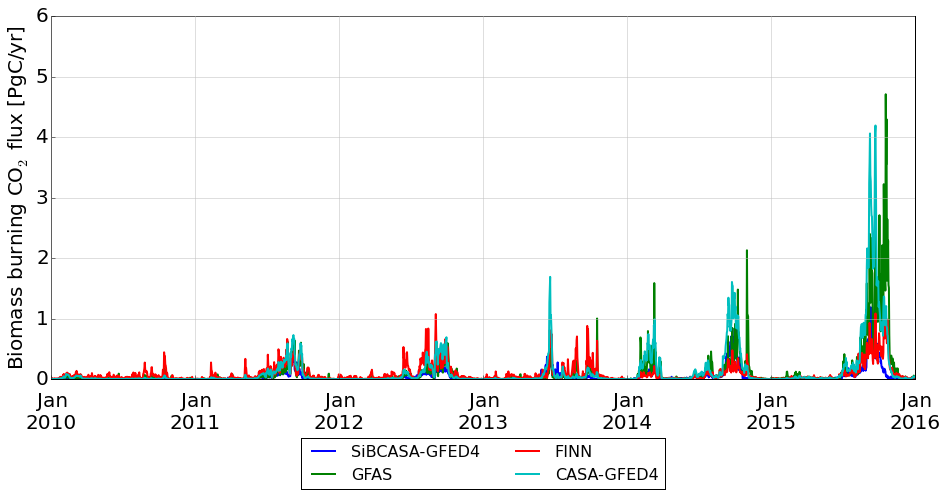

In [23]:
####################################################   Daily Time Series  #########################################################

fig = plt.figure(1,figsize=(15,8))
ax = fig.add_axes([0.1,0.2,0.8,0.7])
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

minyear = 2010
maxyear = 2016

for ii,dirbf in enumerate(biofireparamdirs):
    alltimes = []
    allbb = []
    print dirbf
    for y in range(minyear,maxyear):
        print y
        for fname in os.listdir(dirbf):
            #print fname
            if fname.startswith('READ'): continue
            if not int(fname[-9:-5]) == y: continue
            bf = cdf.Dataset(dirbf+fname)
            #print bf
            if 'co2fire' in bf.variables.keys():
                bb = np.float32(bf.variables['co2fire'][:])
            else: bb = bf.variables['bb'][:]
            m = int(fname[-5:-3])
            days = calendar.monthrange(y,m)[1]
            for d in range(1,days+1):
                dd = dt.datetime(y,m,d,0,0)
                alltimes.append(dd)
                bb_day = bb[(d-1)*8:d*8,:,:].mean(axis=0)
                allbb.append((bb_day*data*glarea*fac).sum()) 
                
            #print max(allbb)
            #print shape(alltimes), shape(allbb)
            
    ax.plot(alltimes,allbb,label=labels[ii],lw=2)
ax.set_ylim(0,6)    
ax.set_xlim(dt.date(2010,1,1),dt.date(2016,1,1))
ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%b\n%Y'))
ax.grid(True, ls='-', color='0.75') # setting the grid and the color on a grey scale
ax.set_ylabel('Biomass burning CO$_2$ flux [PgC/yr]',fontsize=20)
dummy=[lab.set_fontsize(20) for lab in ax.get_xticklabels()]
dummy=[lab.set_fontsize(20) for lab in ax.get_yticklabels()]
ax.tick_params(axis='x', pad=12)
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,box.width, box.height * 0.9])
ax.legend(loc='upper center',bbox_to_anchor=(0.5,-0.14),ncol=2,prop={'size':16})
#fig.savefig('Fig1_Daily_fires_2010-2016.png')

In [ ]:
################################################ Yearly Values ##############################################################

fig = plt.figure(1,figsize=(15,8))
ax = fig.add_axes([0.1,0.2,0.8,0.7])
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

minyear = 2010
maxyear = 2016

for ii,dirbf in enumerate(biofireparamdirs):
    alltimes = []
    allbb = []
    print dirbf
    for y in range(minyear,maxyear):
        print y
        
        if calendar.isleap(y):
            days_in_y = 366
        else: 
            days_in_y = 365
        
        for fname in os.listdir(dirbf):
            
            if fname.startswith('READ'): continue
            if not int(fname[-9:-5]) == y: continue
            bf = cdf.Dataset(dirbf+fname)
            if 'co2fire' in bf.variables.keys():
                bb = np.float32(bf.variables['co2fire'][:])
            else: 
                bb = bf.variables['bb'][:]
            if bb.shape[0] == 180: #add time dimension
                bb.resize(1,180,360)  
            try: 
                bb[bb.mask] = 0
                bb = np.array(bb)
            except: pass    
            if int(fname[-5:-3]) == 1: 
                bb_sum = bb
            else: bb_sum = np.append(bb_sum,bb,axis=0) # revise syntax of append
            bf.close()
        
        bb_sum = bb_sum.mean(axis=0) # Am I taking the annual average here for each grid box? Yes
        bb_year = (bb_sum*data*glarea*fac).sum() #here i am adding the emissions and calculating them for the area
        #print bb_sum
        #print (bb_sum*glarea*fac).sum()
        allbb.append(bb_year)
        alltimes.append(y)
    print alltimes, allbb
        
    ax.plot(alltimes,allbb,'o',label=labels[ii],lw=2) 

ax.set_ylim(0,0.5)
ax.set_xlim(2009,2016)
ax.set_xticklabels(np.arange(2009,2016))
#ax.set_xlim(dt.date(2010,1,1),dt.date(2015,1,1))
#ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%Y'))
ax.grid(True, ls='-', color='0.75') # setting the grid and the color on a grey scale
ax.set_ylabel('Biomass burning CO$_2$ flux [PgC/yr]',fontsize=20)
dummy=[lab.set_fontsize(20) for lab in ax.get_xticklabels()]
dummy=[lab.set_fontsize(20) for lab in ax.get_yticklabels()]   
ax.tick_params(axis='x', pad=12)
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,box.width, box.height * 0.9])
ax.legend(loc='upper center',bbox_to_anchor=(0.5,-0.14),ncol=2,prop={'size':16})
#fig.savefig('Fig2_Alt_YearlyValues_2010-2016.png')

/Storage/CO2/carbontracker/input/ctdas_2012/biosphere/gfed4_daily_sibcasa_3hr/
2010


/Storage/CO2/carbontracker/input/ctdas_2012/biosphere/gfed4_daily_sibcasa_3hr/
2010
2011
2012
2013
2014
2015
[2010, 2011, 2012, 2013, 2014, 2015] [-0.3997573008513729, -0.40324179742973149, -0.60875603520463883, -0.35536659133423831, -0.52739126969613925, -0.68230234160546677]
/Storage/CO2/carbontracker/input/ctdas_2012/biosphere/gfed4_daily_sibcasa_3hr_gfas_fires/
2010
2011
2012
2013
2014
2015
[2010, 2011, 2012, 2013, 2014, 2015] [-0.3997573008513729, -0.40324179742973149, -0.60875603520463883, -0.35536659133423831, -0.52739126969613925, -0.68230234160546677]
/Storage/CO2/carbontracker/input/ctdas_2012/biosphere/gfed4_daily_sibcasa_3hr_finn_fires/
2010
2011
2012
2013
2014
2015
[2010, 2011, 2012, 2013, 2014, 2015] [-0.3997573008513729, -0.40324179742973149, -0.60875603520463883, -0.35536659133423831, -0.52739126969613925, -0.68230234160546677]
/Storage/CO2/carbontracker/input/ctdas_2012/biosphere/casa-gfed4-daily-fires-monthly-bio/
2010
2011
2012
2013
2014
2015
[2010, 2011, 2012, 2013,

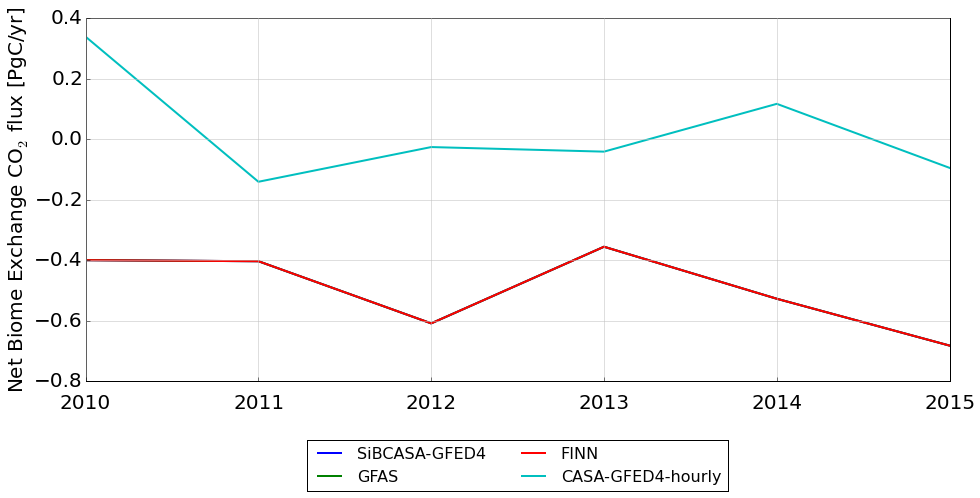

In [26]:
########################################## Net Biome Exchange for SiBCASA and CASA ###########################################

fig = plt.figure(1,figsize=(15,8))
ax = fig.add_axes([0.1,0.2,0.8,0.7])
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

minyear = 2010
maxyear = 2016

for ii,dirbf in enumerate(biofireparamdirs):
    alltimes = []
    allnep = []
    print dirbf
    for y in range(minyear,maxyear):
        print y
        for fname in os.listdir(dirbf):
            if fname.startswith('READ'): continue
            if not int(fname[-9:-5]) == y: continue
            bf = cdf.Dataset(dirbf+fname)
            if 'nep' in bf.variables.keys():
                nep = np.float32(bf.variables['nep'][:])
            if nep.shape[0] == 180: #add time dimension
                nep.resize(1,180,360)  
            try: 
                nep[nep.mask] = 0
                nep = np.array(nep)
            except: pass    
            if int(fname[-5:-3]) == 1: 
                nep_sum = nep
            else: nep_sum = np.append(nep_sum,nep,axis=0) 
            bf.close()
        
        nep_sum = nep_sum.mean(axis=0) # Am I taking the annual average here for each grid box? Yes
        nep_year = (nep_sum*data*glarea*fac).sum() #here i am adding the emissions and calculating them for the area
        allnep.append(nep_year)
        alltimes.append(y)
    print alltimes, allnep
        
    ax.plot(alltimes,allnep,label=labels[ii],lw=2) 

ax.set_xlim(2010,2015)
ax.set_xticklabels(np.arange(2010,2016))
#ax.set_xlim(dt.date(2010,1,1),dt.date(2015,1,1))
#ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%Y'))
ax.grid(True, ls='-', color='0.75') # setting the grid and the color on a grey scale
ax.set_ylabel('Net Biome Exchange CO$_2$ flux [PgC/yr]',fontsize=20)
dummy=[lab.set_fontsize(20) for lab in ax.get_xticklabels()]
dummy=[lab.set_fontsize(20) for lab in ax.get_yticklabels()]   
ax.tick_params(axis='x', pad=12)
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,box.width, box.height * 0.9])
ax.legend(loc='upper center',bbox_to_anchor=(0.5,-0.14),ncol=2,prop={'size':16})
#fig.savefig('Fig5_NBE_2010-2016.png')

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:5: MaskedArrayFutureWarning: setting an item on a masked array which has a shared mask will not copy the mask and also change the original mask array in the future.
Check the NumPy 1.11 release notes for more information.


<type 'numpy.ndarray'>
0.0 0.00026118991669
<type 'numpy.ndarray'>
0.0 0.000187136210941
0.0 0.00026118991669
<type 'numpy.ndarray'>


<matplotlib.colorbar.Colorbar instance at 0x10fd18ef0>

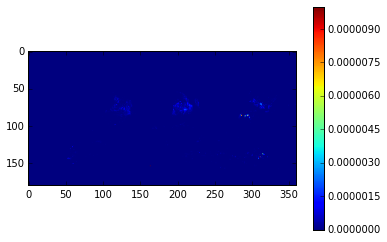

In [10]:
#Testing why there where strange values in FINN and GFAS files for 1 month
f=cdf.Dataset('/Storage/CO2/carbontracker/input/ctdas_2012/biosphere/gfed4_daily_sibcasa_3hr_gfas_fires/biofireparams_sibcasa_ei_201409.nc')
bb=f.variables['co2fire'][:]
try: 
    bb[bb.mask] = 0
    bb = np.array(bb)
except: pass    
print type(bb)
print bb.min(), bb.max()
f2=cdf.Dataset('/Storage/CO2/carbontracker/input/ctdas_2012/biosphere/gfed4_daily_sibcasa_3hr_gfas_fires/biofireparams_sibcasa_ei_201410.nc')
bb2=f2.variables['co2fire'][:]
try: 
    bb2[bb2.mask] = 0
    bb2 = np.array(bb2)
except: pass  
print type(bb2)

print bb2.min(), bb2.max()

bb_sum = np.append(bb,bb2,axis=0)
print bb_sum.min(), bb_sum.max()
print type(bb_sum)

imshow(bb_sum.mean(axis=0),vmin=0,vmax=0.000010)
colorbar()